In [1]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Carga de datos.
datos = datasets.load_boston()
# print(datos)
X = datos.data
y = datos.target
print('Dimensiones de X: ', np.shape(X))

Dimensiones de X:  (506, 13)


In [3]:
# Métricas de evaluación.
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'MSE': 'neg_mean_squared_error',
  'RMSE': 'neg_root_mean_squared_error',
  'R2':   'r2'
}

In [4]:
# Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))

(404, 13)


In [13]:
# Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)

In [14]:
# Construcción del algoritmo de aprendizaje.
reg = linear_model.LinearRegression()

In [17]:
# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_validate(reg, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
# print("cross_val_MAE:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))
pprint(cross_val_results)

{'fit_time': array([0.00128388, 0.00153589, 0.00115013, 0.00103712, 0.00143504]),
 'score_time': array([0.00148392, 0.00120497, 0.00169802, 0.00211287, 0.001616  ]),
 'test_MAE': array([-3.21076048, -3.49646957, -3.77356487, -3.92171483, -2.73953332]),
 'test_MSE': array([-23.28643805, -23.56464901, -36.47451945, -25.75577706,
       -12.51053666]),
 'test_R2': array([0.6724828 , 0.76007223, 0.58945002, 0.75917498, 0.81121207]),
 'test_RMSE': array([-4.82560235, -4.85434331, -6.03941383, -5.07501498, -3.5370237 ])}


In [8]:
# Entrenamiento con todos los datos para obtener los coeficientes del modelo.
model = reg.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
w = model.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]

Término independiente:  22.796534653465375


In [ ]:
# ---- PREDICCIÓN ---- #

In [9]:
# Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [10]:
# Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)
print(y_pred_test)

[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.83076916 13.25620627 20

In [11]:
# Cálculo de las métricas de evaluación.
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE:  %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('R2:   %.4f' % R2)

MAE:  3.1891
MSE:  24.2911
RMSE: 4.9286
R2:   0.6688


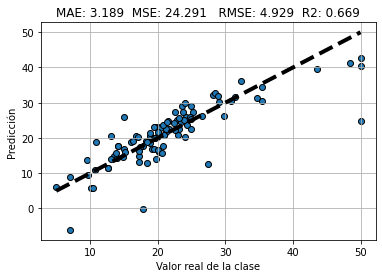

In [12]:
# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
ax.scatter(y_testing, y_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  MSE: %.3f   RMSE: %.3f  R2: %.3f" %
          (MAE, MSE, RMSE, R2))
plt.grid()
plt.show()